## Create model size plots for different tasks

In [58]:
import matplotlib.pyplot as plt
import numpy as np

### Helsinki Prominence Regression Absolute Task

In [59]:
helsinki_reg_absolute = {
    "gloVe": {"size": 120, "MSE": 0.41, "R2": 0.36, "Pearson": 0.60},
    "BERT-large": {
        "size": 336,
        "MSE": 0.3179,
        "R2": 0.5123,
        "Pearson": 0.7166,
    },
    "BERT": {
        "size": 110,
        "MSE": 0.3179,
        "R2": 0.5124,
        "Pearson": 0.717,
    },
    "gpt-2": {
        "size": 117,
        "MSE": 0.3478,
        "Pearson": 0.684,
        "R2": 0.467,
    },
    "gpt2-medium": {
        "size": 355,
        "MSE": 0.3462,
        "Pearson": 0.686,
        "R2": 0.469,
    },
    "gpt2-large": {
        "size": 774,
        "MSE": 0.3462,
        "Pearson": 0.686,
        "R2": 0.467,
    },
}

In [60]:
def plot_model_metrics(model_dict):
    import matplotlib.pyplot as plt

    # Create separate lists for each model type
    glove_models = []
    bert_models = []
    gpt_models = []

    # Fill lists with data
    for key, value in model_dict.items():
        if "gloVe" in key:
            glove_models.append((key, value))
        elif "BERT" in key:
            bert_models.append((key, value))
        elif "gpt" in key:
            gpt_models.append((key, value))

    fig, axs = plt.subplots(
        1, 3, figsize=(18, 6)
    )  # Create a figure and a set of subplots

    # Adjustments for shared x-axis
    max_model_size = max(
        value["size"] for key, value in model_dict.items() if "size" in value
    )
    for ax in axs:
        ax.set_xlim(0, max_model_size + 100)

    # Plot each metric
    for ax, metric in zip(axs, ["MSE", "R2", "Pearson"]):
        # Plot GloVe models
        for model in glove_models:
            ax.scatter(
                model[1].get("size", 0),
                model[1][metric],
                marker="d",
                color="m",
                label=model[0],
                s=100,
            )
            ax.annotate(
                model[0],
                (model[1].get("size", 0), model[1][metric]),
                textcoords="offset points",
                xytext=(0, 10),
                ha="center",
            )

        # Plot BERT models
        for model in bert_models:
            ax.scatter(
                model[1]["size"],
                model[1][metric],
                marker="*",
                color="r",
                label=model[0],
                s=140,
            )
            ax.annotate(
                model[0],
                (model[1]["size"], model[1][metric]),
                textcoords="offset points",
                xytext=(0, 10),
                ha="center",
            )

        # Plot GPT models
        for model in gpt_models:
            ax.scatter(
                model[1]["size"],
                model[1][metric],
                marker=".",
                color="g",
                label=model[0],
                s=140,
            )
            ax.annotate(
                model[0],
                (model[1]["size"], model[1][metric]),
                textcoords="offset points",
                xytext=(0, 10),
                ha="center",
            )

        ax.set(
            xlabel="Model Size in M Parameters",
            ylabel=metric,
            title=f"Model Performance - {metric}",
        )
        ax.grid(True)

        # Increase font size for better readability
        ax.title.set_fontsize(16)
        ax.xaxis.label.set_fontsize(14)
        ax.yaxis.label.set_fontsize(14)

        # Adjust y-axis limits to ensure annotations are not cut out
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin - 0.02 * abs(ymin), ymax + 0.02 * abs(ymax))

    plt.tight_layout()  # Ensure adequate spacing
    plt.show()

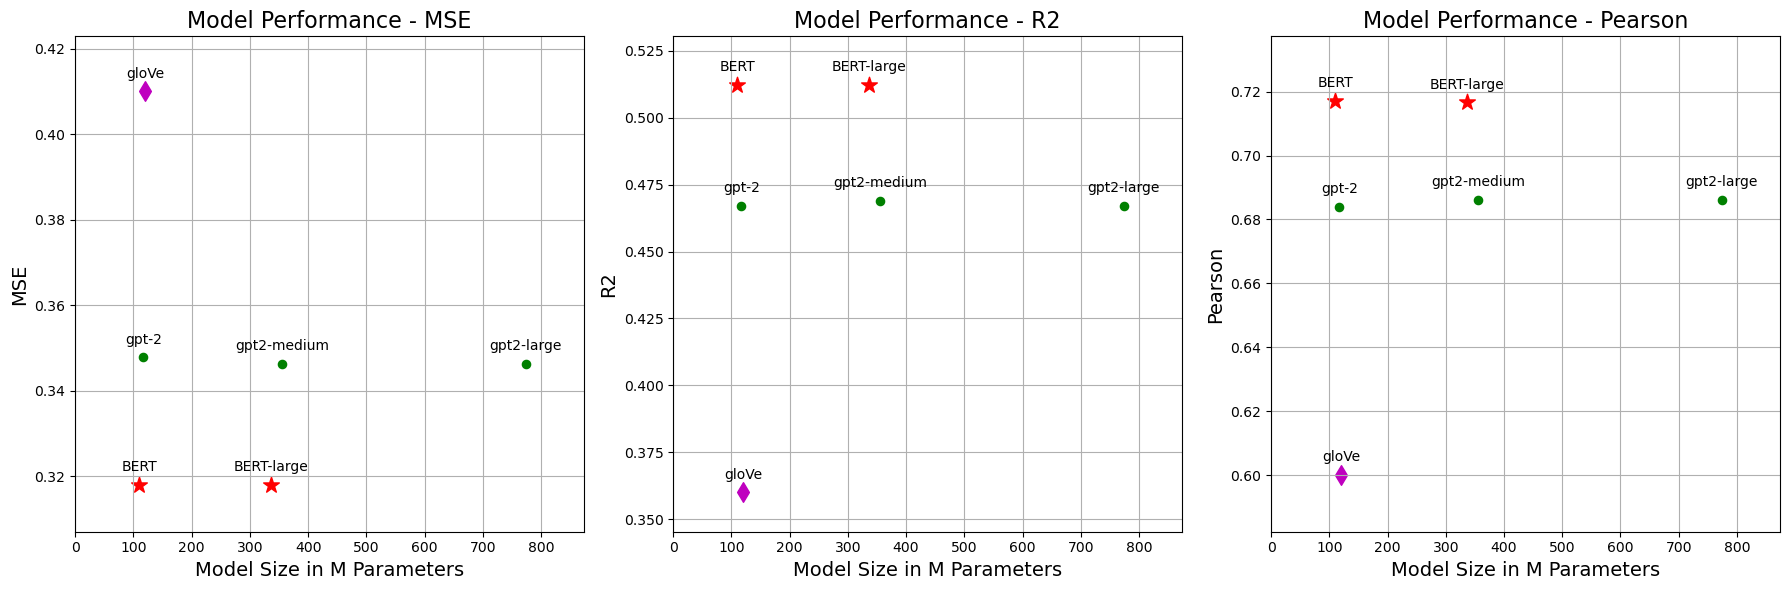

In [61]:
plot_model_metrics(helsinki_reg_absolute)